# **Stock Price Prediction and Analysis using different Regression models**

In [0]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
# The historical data of stock prices of Apple was downloaded from Yahoo! Finance Website in the .csv format
# Website - https://finance.yahoo.com/quote/AAPL/history?p=AAPL

# Reading the CSV file

df = pd.read_csv('/AAPL.csv')
df.set_index('Date', inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-06,214.050003,214.419998,212.509995,213.259995,213.259995,19362300
2019-09-09,214.839996,216.440002,211.070007,214.169998,214.169998,27309400
2019-09-10,213.860001,216.779999,211.710007,216.699997,216.699997,31777900
2019-09-11,218.070007,223.710007,217.729996,223.589996,223.589996,44289600
2019-09-12,224.800003,226.419998,222.860001,223.089996,223.089996,32226700


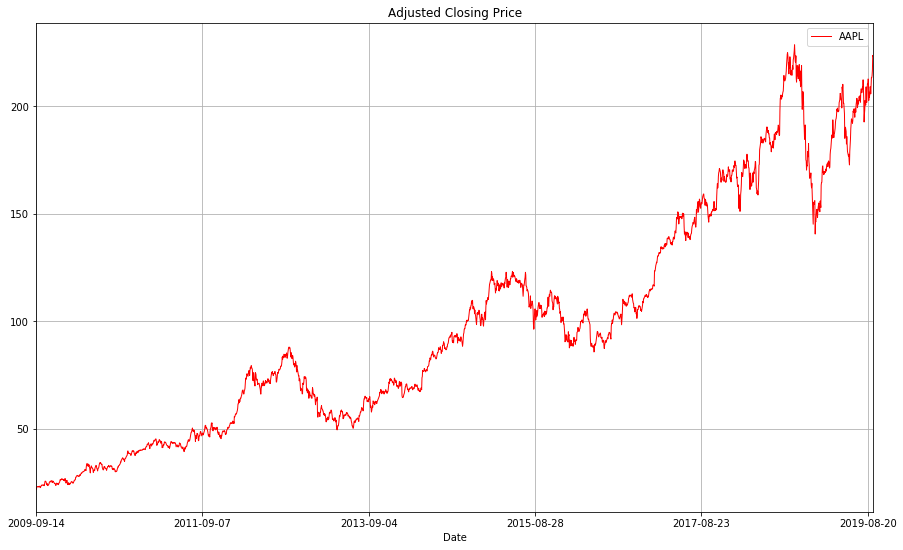

In [3]:
# Visualizing the stock prices

df['Adj Close'].plot(label='AAPL', figsize=(15, 9), title='Adjusted Closing Price', color='red', linewidth=1.0, grid=True)
plt.legend()

In [0]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col = df['Adj Close']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

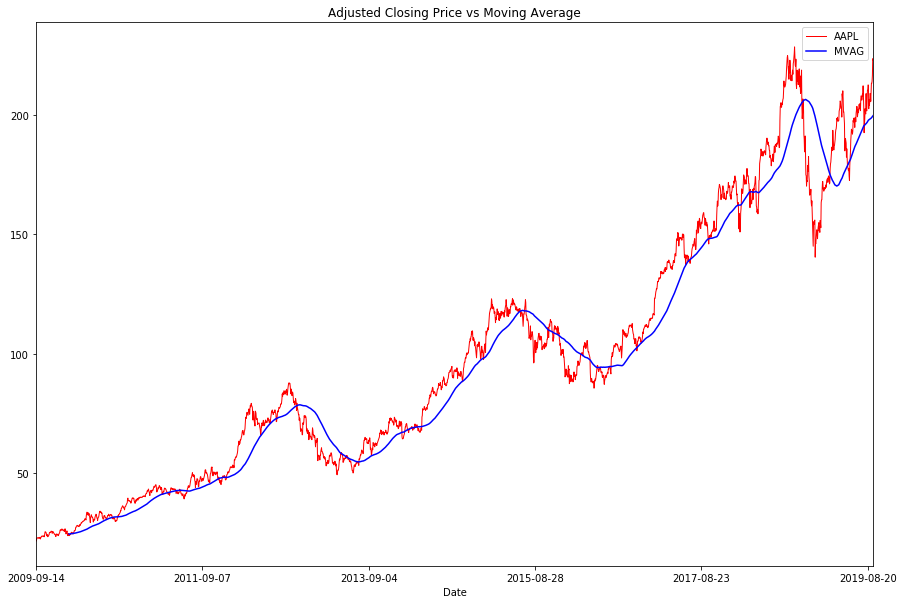

In [5]:
# Visualizing Rolling Mean and Adjusted Closing Price together

df['Adj Close'].plot(label='AAPL', figsize=(15,10), title='Adjusted Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

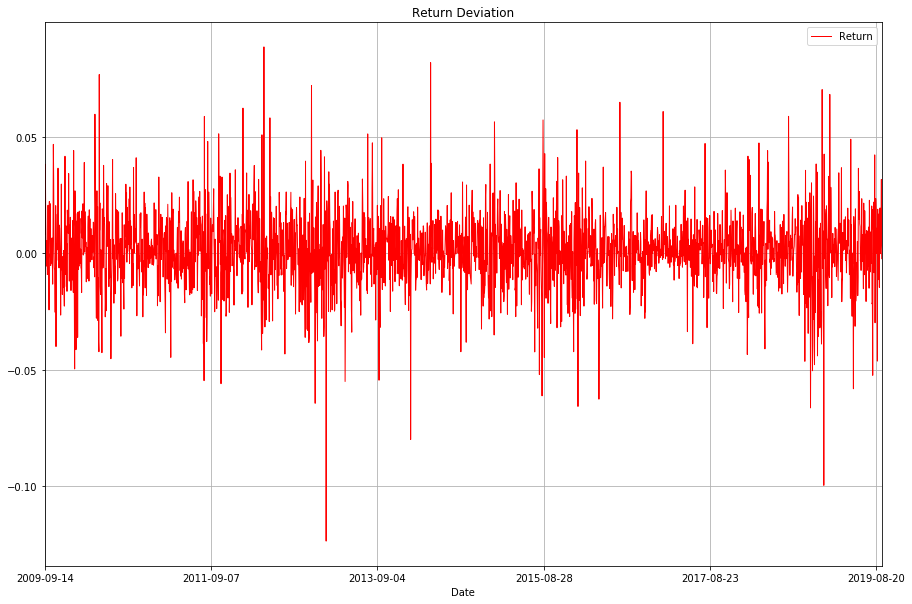

In [6]:
# Return Deviation measures the Mean of the Probability Distribution of Investment Returns if it has a positive/negative Average Net Outcome

rd = close_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(15, 10), title='Return Deviation', color='red', linewidth=1.0, grid=True)
plt.legend()

In [0]:
# Number of days for which to predict the stock prices

predict_days = 30

In [0]:
# Shifting by the Number of Predict days for Prediction array

df['Prediction'] = df['Adj Close'].shift(-predict_days)
# print(df['Prediction'])
# print(df['Adj Close'])

In [9]:
# Dropping the Prediction Row

X = np.array(df.drop(['Prediction'], axis = 1))
X = X[:-predict_days]      # Size upto predict days
# print(X)
print(X.shape)

(2487, 6)


In [10]:
# Creating the Prediction Row

y = np.array(df['Prediction'])
y = y[:-predict_days]      # Size upto predict_days
# print(y)
print(y.shape)

(2487,)


In [11]:
# Splitting the data into Training data & Testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1989, 6)
(1989,)
(498, 6)
(498,)


## 1. Linear Regression
Building First model of regression - Linear Regression

In [12]:
# Defining the Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)      # Training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Score of the Linear Regression Model (Using the Test Data)

linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score)

Linear Model score: 0.960495435536601


In [0]:
# Define the Real & Prediction Values

X_predict = np.array(df.drop(['Prediction'], 1))[-predict_days:]

linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], 1)))

In [0]:
# Defining some Parameters

predicted_dates = []
recent_date = df.index.max()
display_at = 1000
alpha = 0.5

for i in range(predict_days):
    recent_date += str(timedelta(days=1))
    predicted_dates.append(recent_date)

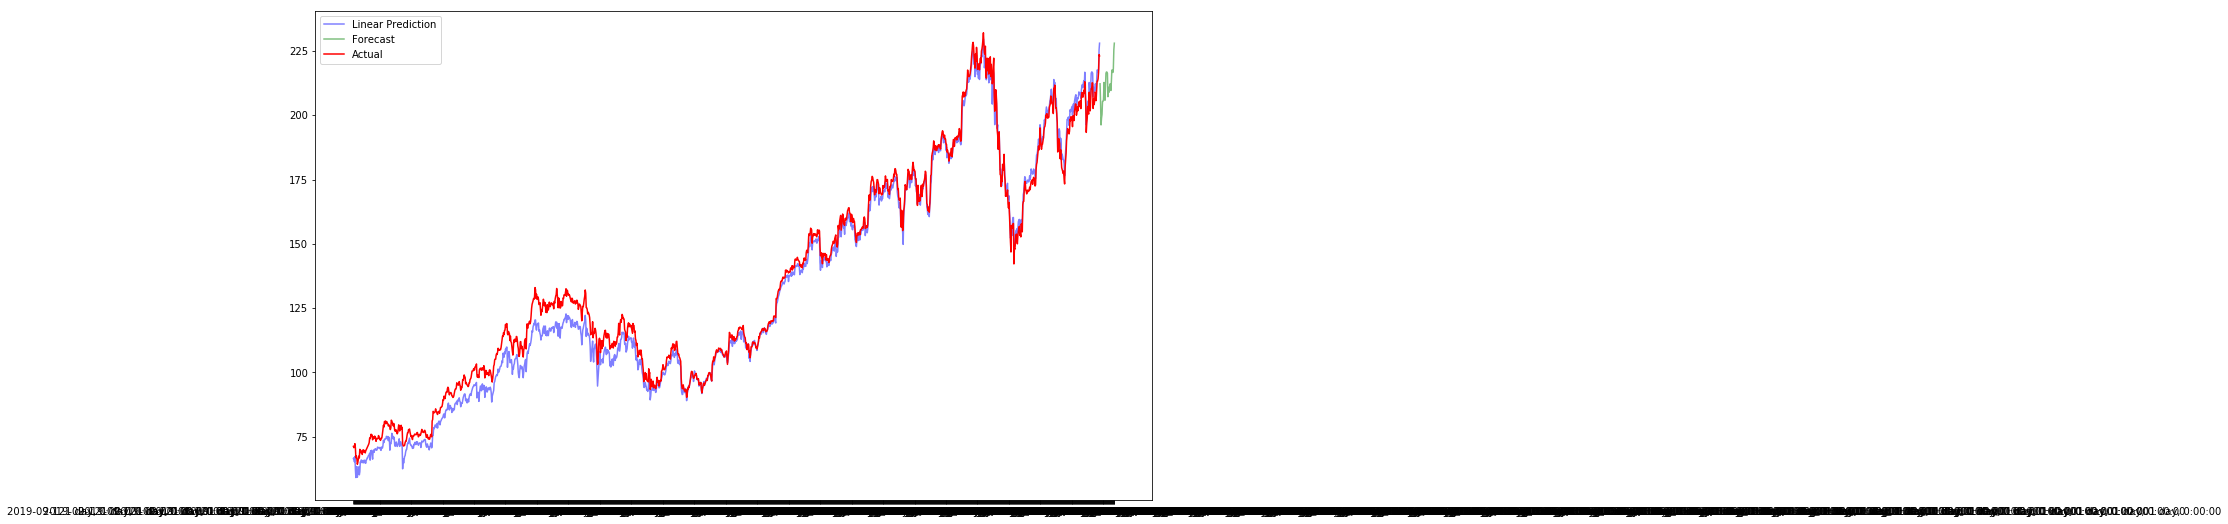

In [16]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

## 2. Ridge Regression
Building Second model of regression - Ridge Regression

In [17]:
# Defining the Ridge Regression Model

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)     # Training the algorithm

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10881e-17): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
# Score of the Ridge Regression Model (Using the Test Data)

ridge_model_score = ridge_model.score(X_test, y_test)
print('Ridge Model score:', ridge_model_score)

Ridge Model score: 0.9604986357324167


In [0]:
# Define the Real & Prediction Values

ridge_model_predict_prediction = ridge_model.predict(X_predict)
ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(['Prediction'], 1)))

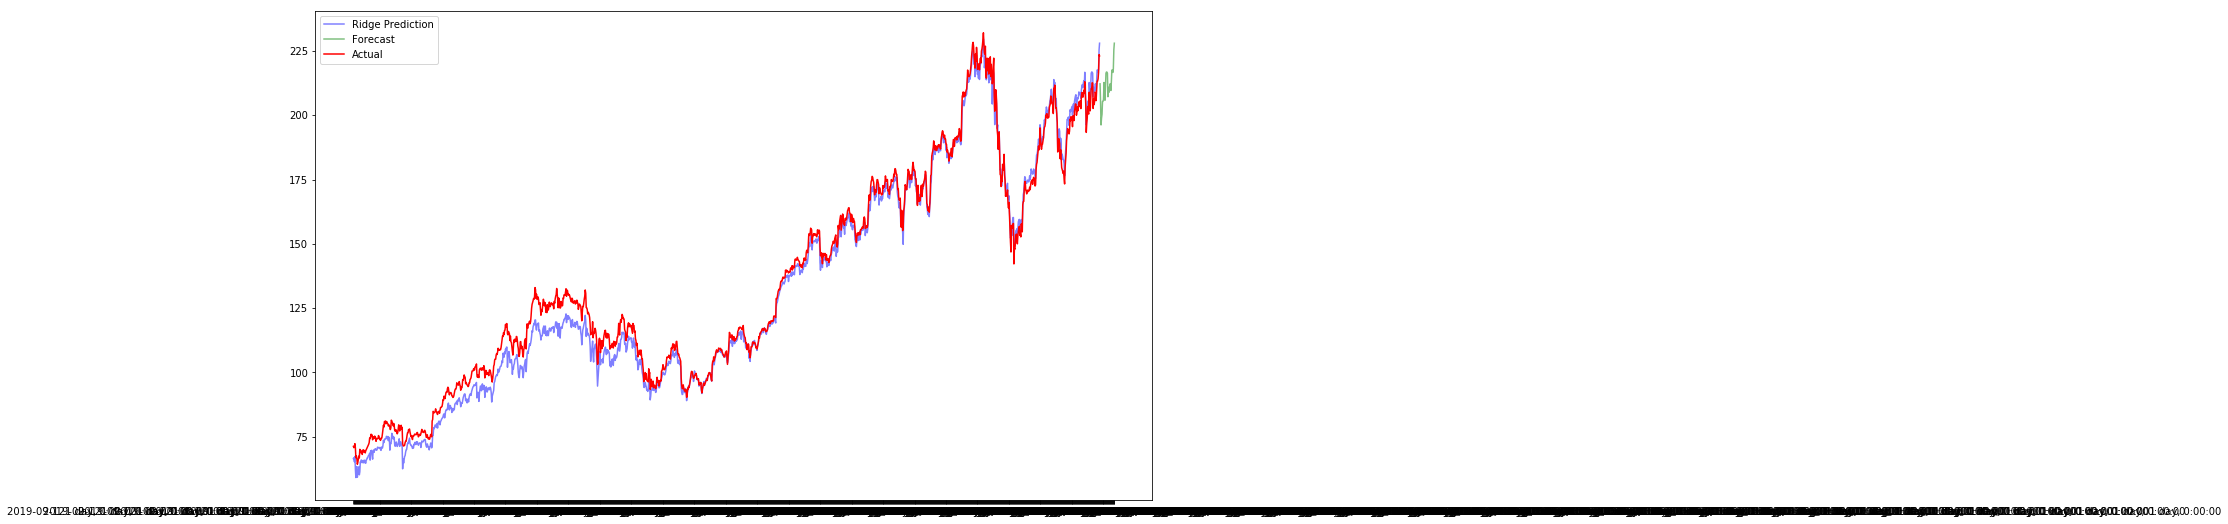

In [20]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, ridge_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

## 3. Lasso Regression
Building Third model of regression - Lasso Regression

In [21]:
# Defining the Lasso Regression Model

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)     # Training the algorithm

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15991.191855316429, tolerance: 554.6072774484938
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
# Score of the Lasso Regression Model (Using the Test Data)

lasso_model_score = lasso_model.score(X_test, y_test)
print('Lasso Model score:', lasso_model_score)

Lasso Model score: 0.9605989209785889


In [0]:
# Define the Real & Prediction Values

lasso_model_predict_prediction = lasso_model.predict(X_predict)
lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['Prediction'], 1)))

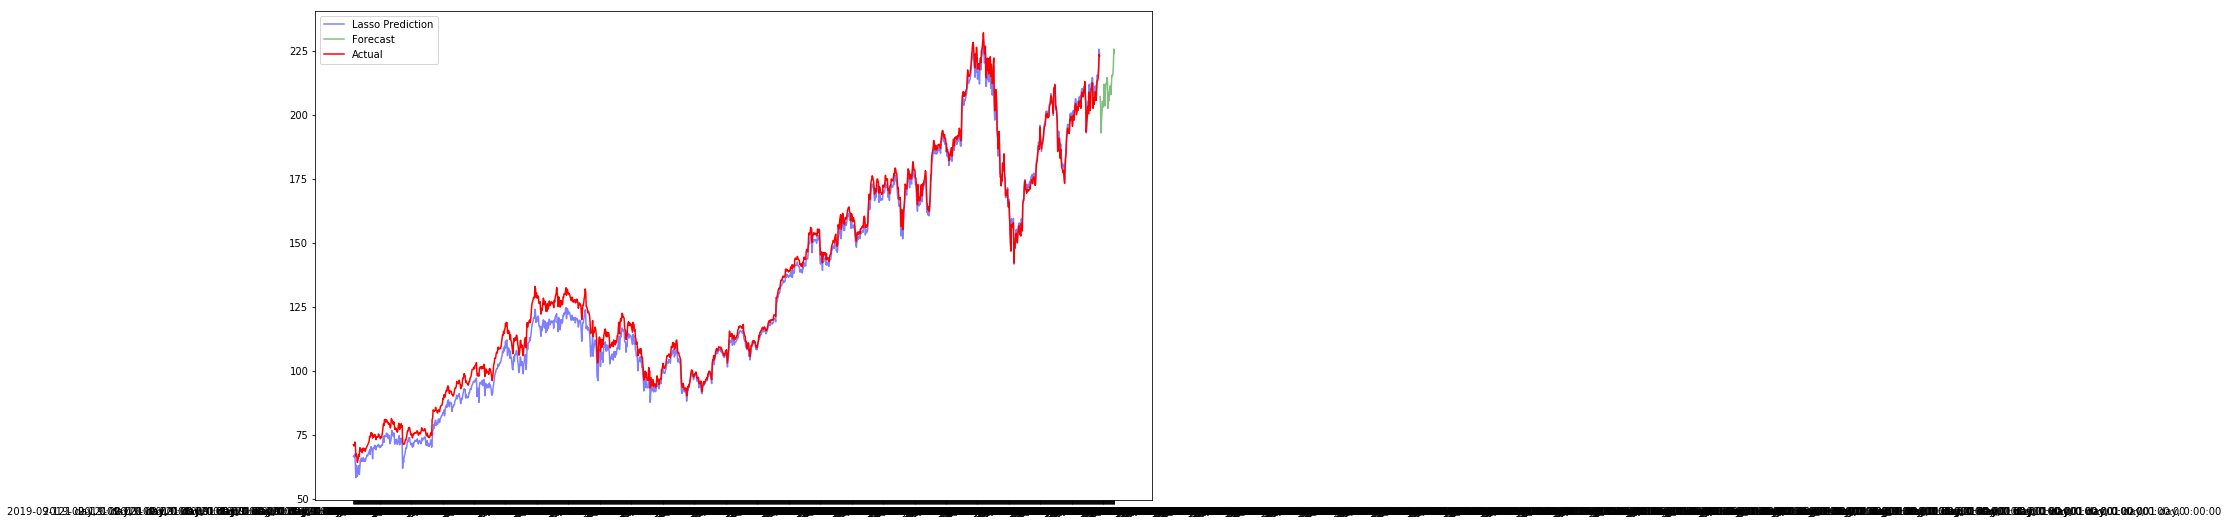

In [24]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Prediction', c='blue', alpha=alpha)
plt.plot(predicted_dates, lasso_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

In [25]:
# Best Performance of the Regressor Models

best_score = max(linear_model_score, ridge_model_score, lasso_model_score)
index = np.argmax([linear_model_score, ridge_model_score, lasso_model_score])
best_regressor = {0:'Linear Regression Model',
                  1:'Ridge Model',
                  2:'Lasso Model'}
print("The Best Performer is {0} with the score of {1}%.".format(best_regressor[index], best_score*100))

The Best Performer is Lasso Model with the score of 96.05989209785889%.
